In [39]:
import pandas as pd

energy = pd.read_csv("energy.csv")

In [40]:
energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


In [41]:
energy[energy["solar"].isna()]["hour"].unique()

array([23,  0,  1,  2,  3,  4, 19, 20, 21, 22, 18,  5])

In [42]:
# filling missing values for solar
energy["solar"] = np.where(energy["solar"].isna(), 0, energy["solar"])

# fillna
energy["solar"] = energy["solar"].fillna(0)

In [43]:
import numpy as np

energy["is_weekend"] = np.where(
    energy["weekday"]>4,
    1,
    0
)

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,is_weekend
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1,0
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1,0
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1,0
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1,0


In [44]:
energy["cos_hour"] = energy["hour"].map(
    lambda h: np.cos(2*np.pi*h/24)
)

energy["cos_month"] = energy["month"].map(
    lambda h: np.cos(2*np.pi*h/12)
)

energy["cos_weekday"] = energy["weekday"].map(
    lambda h: np.cos(2*np.pi*h/7)
)

energy["cos_day"] = energy["day"].map(
    lambda h: np.cos(2*np.pi*h/30)
)

# drop columns
energy = energy.drop(columns=["hour", "month", "weekday", "day"])

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,is_weekend,cos_hour,cos_month,cos_weekday,cos_day
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,0,0.965926,1.000000,1.00000,0.978148
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,0,1.000000,0.866025,0.62349,0.978148
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,0,0.965926,0.866025,0.62349,0.978148
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,0,0.866025,0.866025,0.62349,0.978148
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,0,0.707107,0.866025,0.62349,0.978148


In [45]:
# drop datetime
energy = energy.drop("datetime", axis=1)

In [46]:
# missing values
energy.isna().mean()

power_demand    0.000000
nuclear         0.000000
gas             0.000000
solar           0.000000
hydro           0.000000
coal            0.017054
wind            0.000000
spot_price      0.000000
year            0.000000
is_weekend      0.000000
cos_hour        0.000000
cos_month       0.000000
cos_weekday     0.000000
cos_day         0.000000
dtype: float64

In [59]:
energy[~energy["coal"].isna()]["spot_price"].apply(["min", "mean", "max"])

min      1.00000
mean    48.27345
max     74.74000
Name: spot_price, dtype: float64

In [60]:
energy[energy["coal"].isna()]["spot_price"].apply(["min", "mean", "max"])

min      0.030000
mean    14.999128
max     44.590000
Name: spot_price, dtype: float64

[]

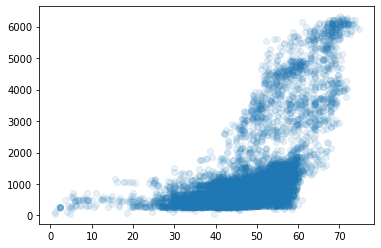

In [63]:
import matplotlib.pyplot as plt

plt.scatter(
    energy["spot_price"],
    energy["coal"],
    alpha=0.1
)
plt.plot()

In [64]:
something = energy[energy["spot_price"]<=44]["coal"].mean()

energy["coal"] = energy["coal"].fillna(something)

[]

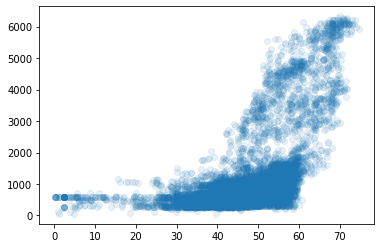

In [65]:
plt.scatter(
    energy["spot_price"],
    energy["coal"],
    alpha=0.1
)
plt.plot()

In [67]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    "power_demand",
    "coal",
    "nuclear",
    "gas",
    "solar",
    "hydro",
    "wind",
]

energy[num_cols] = StandardScaler().fit_transform(energy[num_cols])

energy.head()

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,is_weekend,cos_hour,cos_month,cos_weekday,cos_day
0,-1.152168,-0.391018,-0.933920,-0.777928,0.248263,0.471366,-0.640945,66.88,2018,0,0.965926,1.000000,1.00000,0.978148
1,-1.319952,-0.391018,-0.905592,-0.777235,0.050404,0.280344,-0.829122,66.88,2019,0,1.000000,0.866025,0.62349,0.978148
2,-1.650178,-0.391018,-0.875879,-0.777620,-0.529750,0.216901,-0.883900,66.00,2019,0,0.965926,0.866025,0.62349,0.978148
3,-1.917950,-0.391018,-0.732002,-0.777620,-0.700702,0.070144,-0.924068,63.64,2019,0,0.866025,0.866025,0.62349,0.978148
4,-2.012901,-0.385927,-0.858901,-0.777620,-0.759053,0.070911,-0.805879,58.85,2019,0,0.707107,0.866025,0.62349,0.978148


In [ ]:
# one hot encoding for year


In [ ]:
from sklearn.linear_model import Ridge, Lasso